# PRODIGY INFOTECH VIRTUAL INTERNSHIP - DS TASK 3
build a decision tree classifier uisng the custom "Student Depression Dataset" to predict does student get sucidal thoughts based on the demographic and behavior and other aspects

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("/content/student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [4]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [16]:
# Fill or drop missing values (example: forward fill)
df.fillna(method='ffill', inplace=True)

# Convert categorical features to numeric
df_encoded = pd.get_dummies(df, drop_first=True)

# Print column names to identify target
print(df_encoded.columns)

Index(['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Depression', 'Gender_Male',
       ...
       'Degree_MSc', 'Degree_Others', 'Degree_PhD',
       'Have you ever had suicidal thoughts ?_Yes', 'Financial Stress_2.0',
       'Financial Stress_3.0', 'Financial Stress_4.0', 'Financial Stress_5.0',
       'Financial Stress_?', 'Family History of Mental Illness_Yes'],
      dtype='object', length=115)


/tmp/ipython-input-4063927507.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [17]:
X = df_encoded.drop("Depression", axis=1)  # Features
y = df_encoded["Depression"]               # Target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [20]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8088156244400645
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77      2313
           1       0.85      0.82      0.83      3268

    accuracy                           0.81      5581
   macro avg       0.80      0.81      0.80      5581
weighted avg       0.81      0.81      0.81      5581

Confusion Matrix:
 [[1820  493]
 [ 574 2694]]


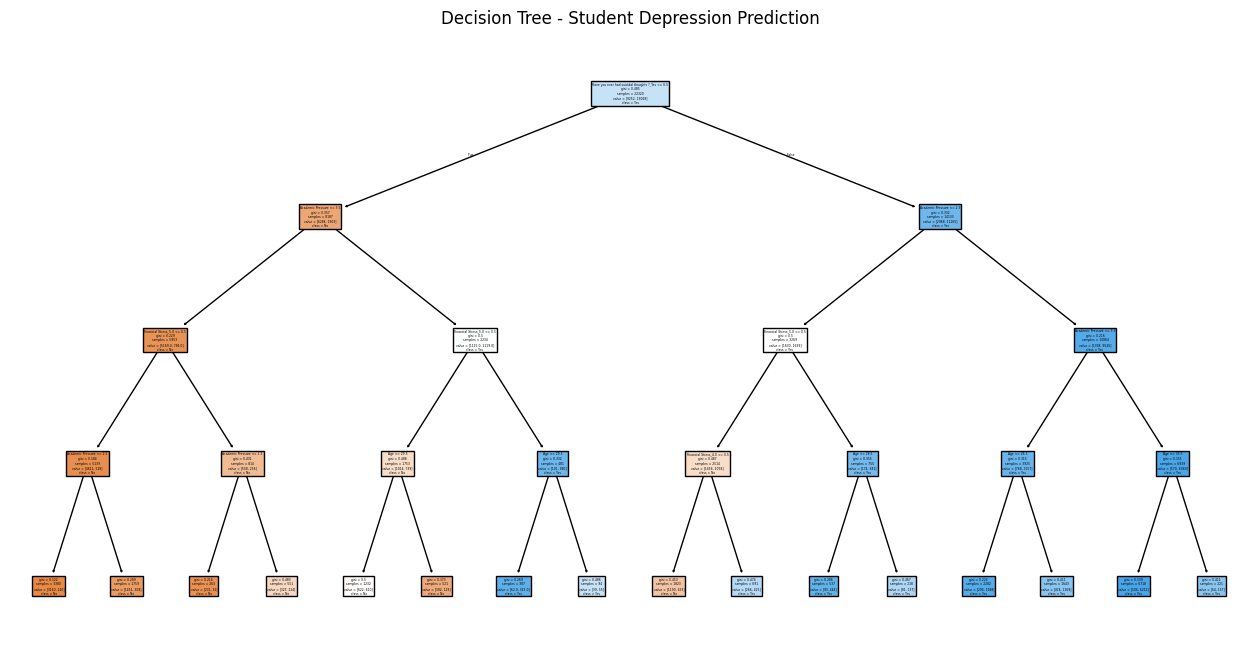

In [21]:
plt.figure(figsize=(16, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.title("Decision Tree - Student Depression Prediction")
plt.show()

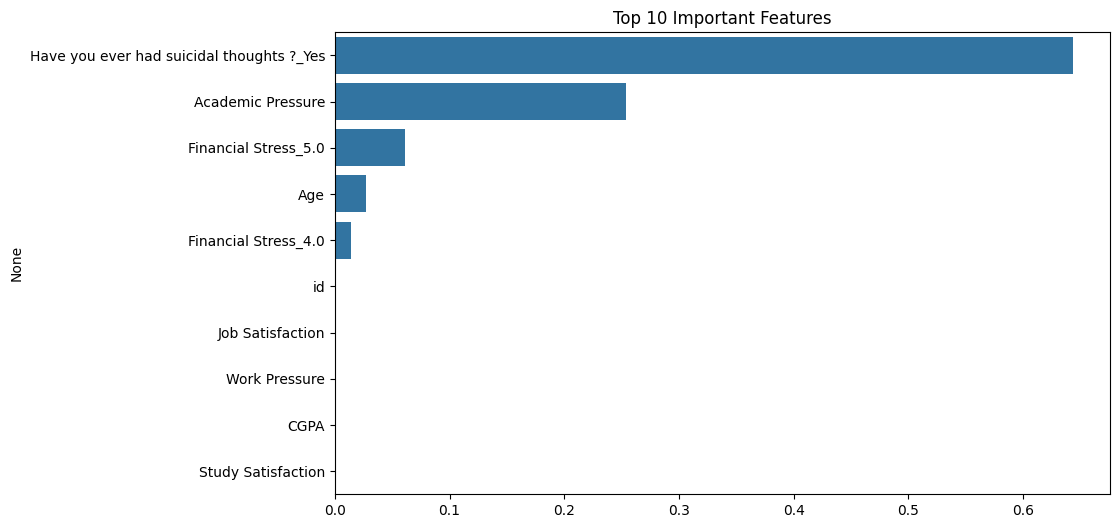

In [22]:
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features")
plt.show()